# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_csv/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities


['concordia',
 'geraldton',
 'dongying',
 'atuona',
 'yellowknife',
 'lemesos',
 'port alfred',
 'sentyabrskiy',
 'vaini',
 'lazaro cardenas',
 'olafsvik',
 'hasaki',
 'karaul',
 'limon',
 'komsomolskiy',
 'vila franca do campo',
 'naze',
 'manggar',
 'ushuaia',
 'iquique',
 'victoria',
 'punta arenas',
 'rikitea',
 'folldal',
 'joshimath',
 'pangnirtung',
 'cabo san lucas',
 'busselton',
 'caravelas',
 'riyadh',
 'lebu',
 'hihifo',
 'tiarei',
 'saskylakh',
 'springbok',
 'clyde river',
 'margate',
 'jamestown',
 'rio gallegos',
 'butaritari',
 'kapaa',
 'kudahuvadhoo',
 'poum',
 'hamilton',
 'barrow',
 'marsh harbour',
 'selma',
 'lalsot',
 'mar del plata',
 'tariba',
 'nanortalik',
 'nerchinskiy zavod',
 'east london',
 'hithadhoo',
 'piacabucu',
 'chokurdakh',
 'saint george',
 'tuktoyaktuk',
 'amderma',
 'vardo',
 'yenagoa',
 'soldatskiy',
 'teguise',
 'pacific grove',
 'saldanha',
 'thompson',
 'norman wells',
 'minab',
 'truth or consequences',
 'codrington',
 'mount gambier',
 '

In [3]:
print(len(cities))

615


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url - found on https://openweathermap.org/current
url = "http://api.openweathermap.org/data/2.5/weather?"

#create lists
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Set loop
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        long.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"])
        
        print(f"Processing record {i}|{city}")
        i+=1
        
    except (KeyError):
        print("City not found. Skipping.")

Processing record 1|concordia
Processing record 2|geraldton
Processing record 3|dongying
Processing record 4|atuona
Processing record 5|yellowknife
City not found. Skipping.
Processing record 6|port alfred
City not found. Skipping.
Processing record 7|vaini
Processing record 8|lazaro cardenas
Processing record 9|olafsvik
Processing record 10|hasaki
City not found. Skipping.
Processing record 11|limon
Processing record 12|komsomolskiy
Processing record 13|vila franca do campo
Processing record 14|naze
Processing record 15|manggar
Processing record 16|ushuaia
Processing record 17|iquique
Processing record 18|victoria
Processing record 19|punta arenas
Processing record 20|rikitea
Processing record 21|folldal
Processing record 22|joshimath
Processing record 23|pangnirtung
Processing record 24|cabo san lucas
Processing record 25|busselton
Processing record 26|caravelas
Processing record 27|riyadh
Processing record 28|lebu
City not found. Skipping.
Processing record 29|tiarei
Processing reco

City not found. Skipping.
Processing record 244|ostrovnoy
Processing record 245|bayji
Processing record 246|tasiilaq
Processing record 247|warrington
Processing record 248|constitucion
Processing record 249|airai
Processing record 250|campos
Processing record 251|qom
Processing record 252|trelew
Processing record 253|pochutla
Processing record 254|ulaanbaatar
Processing record 255|ambilobe
City not found. Skipping.
Processing record 256|konyshevka
Processing record 257|boguchar
Processing record 258|thayetmyo
Processing record 259|provideniya
Processing record 260|mahibadhoo
Processing record 261|rawson
Processing record 262|agapovka
Processing record 263|alihe
Processing record 264|lata
Processing record 265|singkawang
Processing record 266|nioro
Processing record 267|solnechnyy
Processing record 268|davila
Processing record 269|port hardy
Processing record 270|grindavik
Processing record 271|brae
Processing record 272|kibakwe
Processing record 273|valparaiso
City not found. Skipping.

City not found. Skipping.
Processing record 494|san angelo
Processing record 495|vung tau
Processing record 496|gorom-gorom
Processing record 497|puerto escondido
Processing record 498|sawtell
City not found. Skipping.
Processing record 499|iralaya
Processing record 500|hualmay
Processing record 501|aksarka
Processing record 502|tocopilla
Processing record 503|eskil
Processing record 504|svidnik
Processing record 505|nyurba
City not found. Skipping.
Processing record 506|longkou
Processing record 507|rawicz
Processing record 508|luderitz
Processing record 509|utmanzai
Processing record 510|nyuzen
City not found. Skipping.
Processing record 511|vieques
Processing record 512|acari
Processing record 513|caceres
Processing record 514|matara
City not found. Skipping.
Processing record 515|madingou
Processing record 516|springfield
Processing record 517|le port
Processing record 518|itanhaem
Processing record 519|haines junction
Processing record 520|edd
Processing record 521|buala
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create Dataframe


weather_df = {
    "City":city_name,
    "Lat":lat,
    "Long":long,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date,
}


#Display DF
weather_df =pd.DataFrame(weather_df)
weather_df.head()



,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Concordia,-31.3930,-58.0209,291.19,37,{'all': 0},4.02,AR,1633626330
1,Geraldton,-28.7667,114.6000,284.38,87,{'all': 40},3.09,AU,1633625862
2,Dongying,37.4564,118.4856,288.06,70,{'all': 100},2.21,CN,1633626384
3,Atuona,-9.8000,-139.0333,298.68,77,{'all': 36},7.88,PF,1633625822
4,Yellowknife,62.4560,-114.3525,275.60,100,{'all': 90},3.09,CA,1633625838


In [6]:
weather_df= weather_df.rename_axis('City ID')

#Exporting data to csv
weather_df.to_csv("output_csv/city.csv")

In [7]:
humidity

[37,
 87,
 70,
 77,
 100,
 87,
 94,
 70,
 73,
 80,
 83,
 76,
 86,
 72,
 81,
 43,
 67,
 96,
 53,
 78,
 77,
 82,
 87,
 63,
 74,
 56,
 21,
 57,
 78,
 93,
 44,
 100,
 85,
 73,
 40,
 64,
 80,
 72,
 68,
 82,
 86,
 65,
 68,
 39,
 67,
 49,
 58,
 69,
 88,
 75,
 59,
 90,
 52,
 100,
 87,
 87,
 83,
 79,
 94,
 72,
 93,
 49,
 35,
 94,
 100,
 90,
 76,
 83,
 88,
 74,
 73,
 69,
 76,
 77,
 85,
 76,
 78,
 68,
 77,
 57,
 92,
 61,
 78,
 33,
 60,
 24,
 75,
 76,
 70,
 64,
 76,
 44,
 30,
 72,
 73,
 75,
 96,
 95,
 73,
 47,
 43,
 47,
 74,
 49,
 73,
 77,
 58,
 86,
 64,
 90,
 81,
 29,
 78,
 85,
 64,
 15,
 80,
 79,
 94,
 88,
 95,
 25,
 59,
 93,
 61,
 90,
 93,
 95,
 37,
 69,
 83,
 80,
 64,
 82,
 54,
 53,
 84,
 77,
 90,
 92,
 33,
 77,
 83,
 10,
 44,
 73,
 64,
 61,
 94,
 37,
 95,
 89,
 91,
 91,
 86,
 61,
 78,
 79,
 84,
 53,
 10,
 75,
 75,
 71,
 85,
 35,
 89,
 51,
 76,
 90,
 77,
 80,
 24,
 60,
 75,
 81,
 92,
 64,
 78,
 47,
 72,
 71,
 20,
 79,
 95,
 61,
 89,
 72,
 91,
 53,
 87,
 80,
 69,
 62,
 82,
 73,
 81,
 64,
 92,
 

In [8]:

print("After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data")


After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

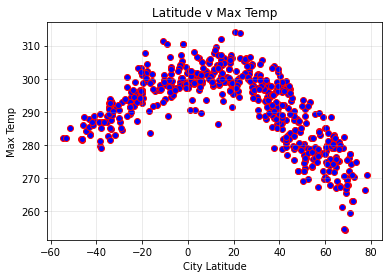

In [11]:
#Create Scatter plot for Latitude v Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "blue", edgecolor = "red")

#Title
plt.title ("Latitude v Max Temp")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Max Temp.png")
           
    

## Latitude vs. Humidity Plot

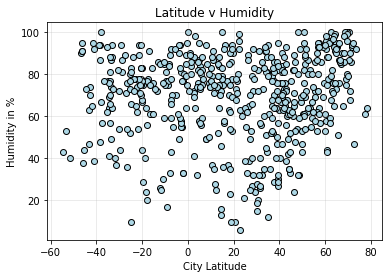

In [12]:
#Create Scatter plot for Latitude v Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "lightblue", edgecolor = "black")

#Title
plt.title ("Latitude v Humidity")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Humidity in %")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Humidity.png")

## Latitude vs. Cloudiness Plot

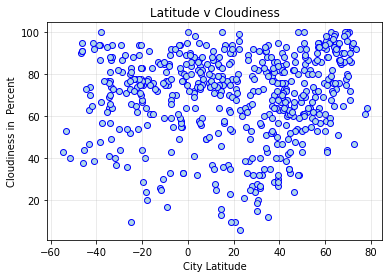

In [13]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "lightblue", edgecolor = "blue")
#Title
plt.title ("Latitude v Cloudiness")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness in  Percent")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Cloudiness.png")

## Latitude vs. Wind Speed Plot

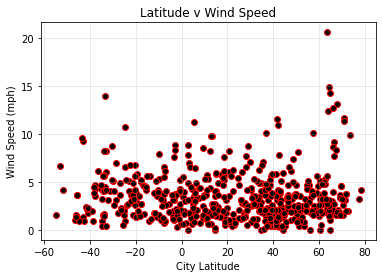

In [14]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "black", edgecolor = "red")
#Title
plt.title ("Latitude v Wind Speed")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [36]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
Southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

In [53]:
# Define function for creating linear agression and scatter plot
# Add the linear regression equation and line to plot
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    
    #Equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [56]:
###Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8331356077617346


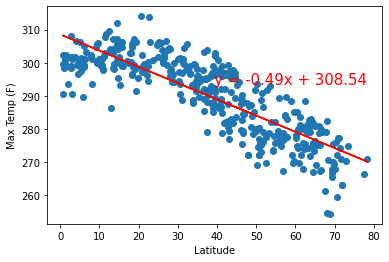

None


In [57]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]

#Label and diplay
plt.ylabel("Max Temp (F)")
print(linear_regression(x_values,y_values))

In [58]:
#Print Correlation
print(f'There is a negative correlation.')

There is a negative correlation.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7972088754697323


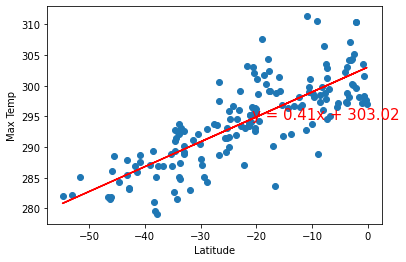

None


In [59]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]


#Label and diplay
plt.ylabel("Max Temp")
print(linear_regression(x_values,y_values))



In [60]:
#Print Correlation
print(f'There is a positive correlation.')

There is a positive correlation.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17447428601292983


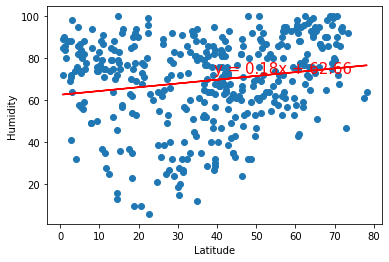

None


In [61]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]


#Label and diplay
plt.ylabel("Humidity")
print(linear_regression(x_values,y_values))


In [62]:
#Print Correlation
print(f'There is a weak positive correlation.')

There is a weak positive correlation.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.014002382746812638


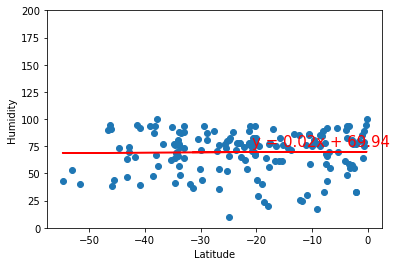

None


In [63]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity")

#Label and diplay
plt.ylabel("Humidity")
print(linear_regression(x_values,y_values))


In [64]:
#Print Correlation
print(f'There is a little if any correlation.')

There is a little if any correlation.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

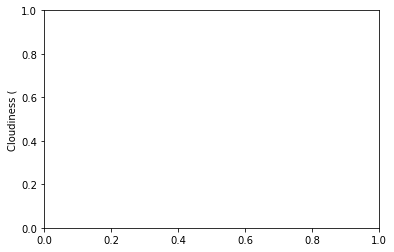

In [65]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]


#Label and diplay
plt.ylabel("Cloudiness (")
print(linear_regression(x_values,y_values))


In [66]:
#Print Correlation
print(f'There is a  correlation.')

There is a  correlation.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

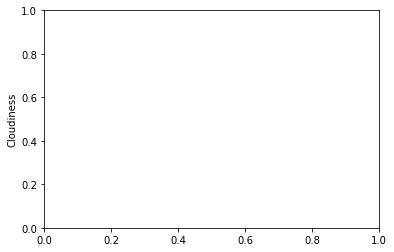

In [67]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]

#Label and diplay
plt.ylabel("Cloudiness")
print(linear_regression(x_values,y_values))

In [68]:
#Print Correlation
print(f'There is a  correlation.')

There is a  correlation.


###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07598520119149803


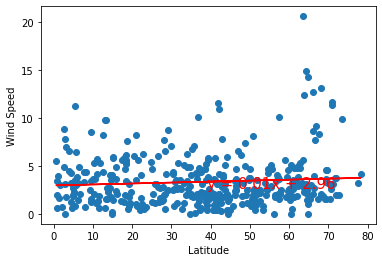

None


In [69]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]

#Label and diplay
plt.ylabel("Wind Speed")
print(linear_regression(x_values,y_values))

In [70]:
#Print Correlation
print(f'There is a weak positive correlation.')

There is a weak positive correlation.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.07393628362050891


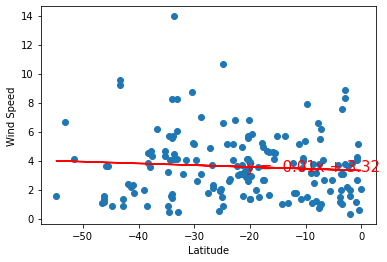

None


In [71]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]

#Label and diplay
plt.ylabel("Wind Speed")
print(linear_regression(x_values,y_values))

In [72]:
#Print Correlation
print(f'There is a weak negative correlation.')

There is a weak negative correlation.
